<a href="https://colab.research.google.com/github/muskan123-sketch/Traffic-Sign-Classification-using-LE-NET-in-KERAS-deep-networks/blob/main/Traffic_Signal_Classification_using_LE_NET_architecture_in_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- In this case study,the images of traffic signs have been provided and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')




# STEP 1: IMPORT LIBRARIES AND DATASET

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
# import libraries 

import pickle
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [16]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [18]:
X_train, y_train = train['features'], train['labels']#labels here represent the classes of features
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [19]:
X_train.shape

(34799, 32, 32, 3)

In [20]:
y_train.shape

(34799,)

# STEP 2: IMAGE EXPLORATION

1


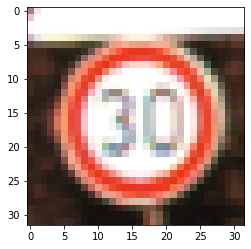

In [21]:
i=3000
plt.imshow(X_train[i])
print(y_train[i])
 # Show images are not shuffled


7


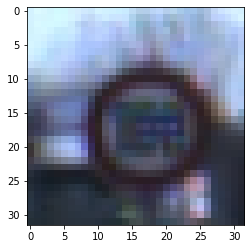

In [22]:
i=3000
plt.imshow(X_validation[i])
print(y_validation[i])


11


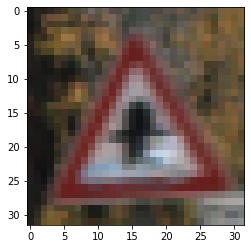

In [23]:
i=3000
plt.imshow(X_test[i])
print(y_test[i])

# STEP 3: DATA PEPARATION

In [24]:
#shuffling the images to chage their order
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)


In [25]:
 #average the pixels to convert them into gray scale 
 X_train_gray=  np.sum(X_train/3,axis=3,keepdims=True )
 X_validation_gray=  np.sum(X_validation/3,axis=3,keepdims=True )
 X_test_gray=  np.sum(X_test/3,axis=3,keepdims=True )
 #sum up all the pixels and divide by 3
 #we want to keep the dimensions of the image same

In [26]:

X_train_gray.shape

(34799, 32, 32, 1)

In [27]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [28]:
X_test_gray.shape


(12630, 32, 32, 1)

In [29]:
X_train_gray_norm=(X_train_gray-128)/128
X_validation_gray_norm=(X_validation_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128

In [30]:
X_train_gray_norm

array([[[[-0.77604167],
         [-0.78385417],
         [-0.76822917],
         ...,
         [-0.66666667],
         [-0.515625  ],
         [-0.63802083]],

        [[-0.78125   ],
         [-0.78645833],
         [-0.78645833],
         ...,
         [-0.54166667],
         [-0.46614583],
         [-0.5234375 ]],

        [[-0.8046875 ],
         [-0.8046875 ],
         [-0.79427083],
         ...,
         [-0.578125  ],
         [-0.47395833],
         [-0.578125  ]],

        ...,

        [[-0.625     ],
         [-0.70572917],
         [-0.734375  ],
         ...,
         [-0.59114583],
         [-0.57552083],
         [-0.59895833]],

        [[-0.70833333],
         [-0.69791667],
         [-0.71614583],
         ...,
         [-0.57291667],
         [-0.58854167],
         [-0.60677083]],

        [[-0.61197917],
         [-0.69270833],
         [-0.69270833],
         ...,
         [-0.63541667],
         [-0.63541667],
         [-0.65104167]]],


       [[[ 0.11979167],


In [31]:
X_validation_gray_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


In [32]:
X_test_gray_norm

array([[[[ 0.1171875 ],
         [ 0.10416667],
         [ 0.11458333],
         ...,
         [-0.07552083],
         [-0.04947917],
         [-0.16666667]],

        [[ 0.12760417],
         [ 0.1171875 ],
         [ 0.12760417],
         ...,
         [ 0.140625  ],
         [ 0.13020833],
         [ 0.11979167]],

        [[ 0.125     ],
         [ 0.13020833],
         [ 0.109375  ],
         ...,
         [ 0.15364583],
         [ 0.15885417],
         [ 0.14583333]],

        ...,

        [[ 0.09635417],
         [ 0.07552083],
         [ 0.08333333],
         ...,
         [ 0.09635417],
         [ 0.09375   ],
         [ 0.1171875 ]],

        [[ 0.08854167],
         [ 0.08333333],
         [ 0.06770833],
         ...,
         [ 0.08072917],
         [ 0.08854167],
         [ 0.09635417]],

        [[ 0.078125  ],
         [ 0.06510417],
         [ 0.09114583],
         ...,
         [ 0.09375   ],
         [ 0.09895833],
         [ 0.10416667]]],


       [[[-0.50520833],


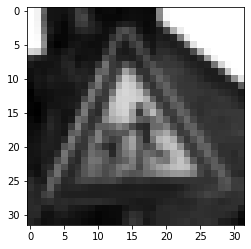

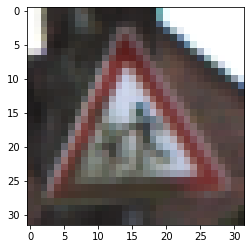

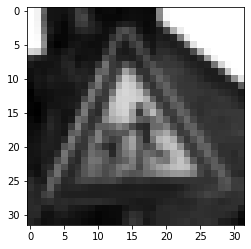

In [33]:
i=610
plt.imshow(X_train_gray[i].squeeze(),cmap='gray')#squeeze as we dont want 1
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')

<Figure size 432x288 with 0 Axes>

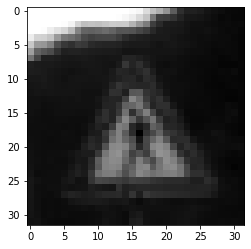

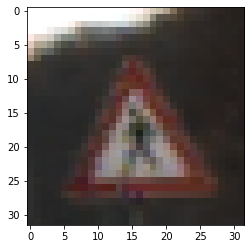

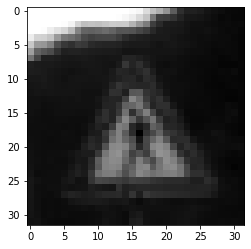

<Figure size 432x288 with 0 Axes>

In [34]:
i=610
plt.imshow(X_test_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(),cmap='gray')
plt.figure()



22


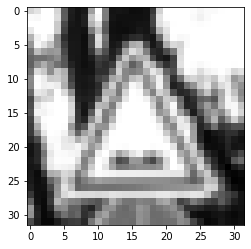

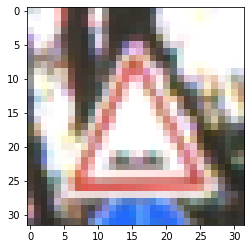

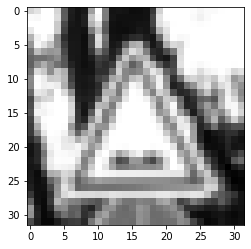

<Figure size 432x288 with 0 Axes>

In [35]:
i=610
plt.imshow(X_validation_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(),cmap='gray')
plt.figure()
print(y_validation[i])

# STEP 4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [36]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [37]:
image_shape = X_train_gray[i].shape

In [38]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [40]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])
#as we have 43 classes thatswhy sparse_categorical_crossenropy

In [41]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,#how ,any images are we passing
                        epochs=5,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/5
70/70 [==============================] - 15s 203ms/step - loss: 3.4675 - accuracy: 0.0974 - val_loss: 2.7773 - val_accuracy: 0.2646
Epoch 2/5
70/70 [==============================] - 14s 198ms/step - loss: 2.0854 - accuracy: 0.4291 - val_loss: 1.4570 - val_accuracy: 0.5751
Epoch 3/5
70/70 [==============================] - 14s 202ms/step - loss: 1.0801 - accuracy: 0.6918 - val_loss: 1.0308 - val_accuracy: 0.6819
Epoch 4/5
70/70 [==============================] - 14s 203ms/step - loss: 0.7344 - accuracy: 0.7915 - val_loss: 0.8459 - val_accuracy: 0.7279
Epoch 5/5
70/70 [==============================] - 14s 203ms/step - loss: 0.5715 - accuracy: 0.8384 - val_loss: 0.7316 - val_accuracy: 0.7814


# STEP 5: MODEL EVALUATION

In [42]:
score=cnn_model.evaluate(X_test_gray_norm,y_test )
print('Test Accuracy:{:4f}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 0.9595 - accuracy: 0.7624
Test Accuracy:0.762391


In [43]:
history.history.keys()#what are the keys we have

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

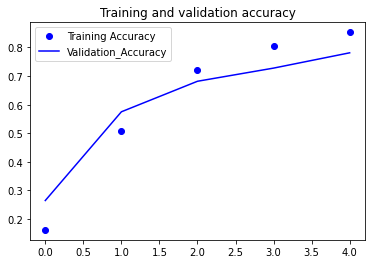

In [49]:
accuracy=history.history['accuracy']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
#lets plot the accuracy and validation accuracy with the no of epochs on x-axis
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation_Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


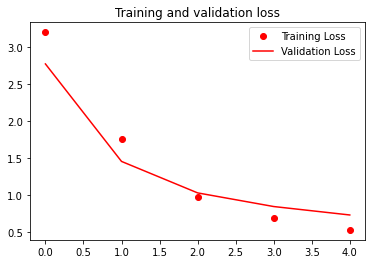

In [50]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [51]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


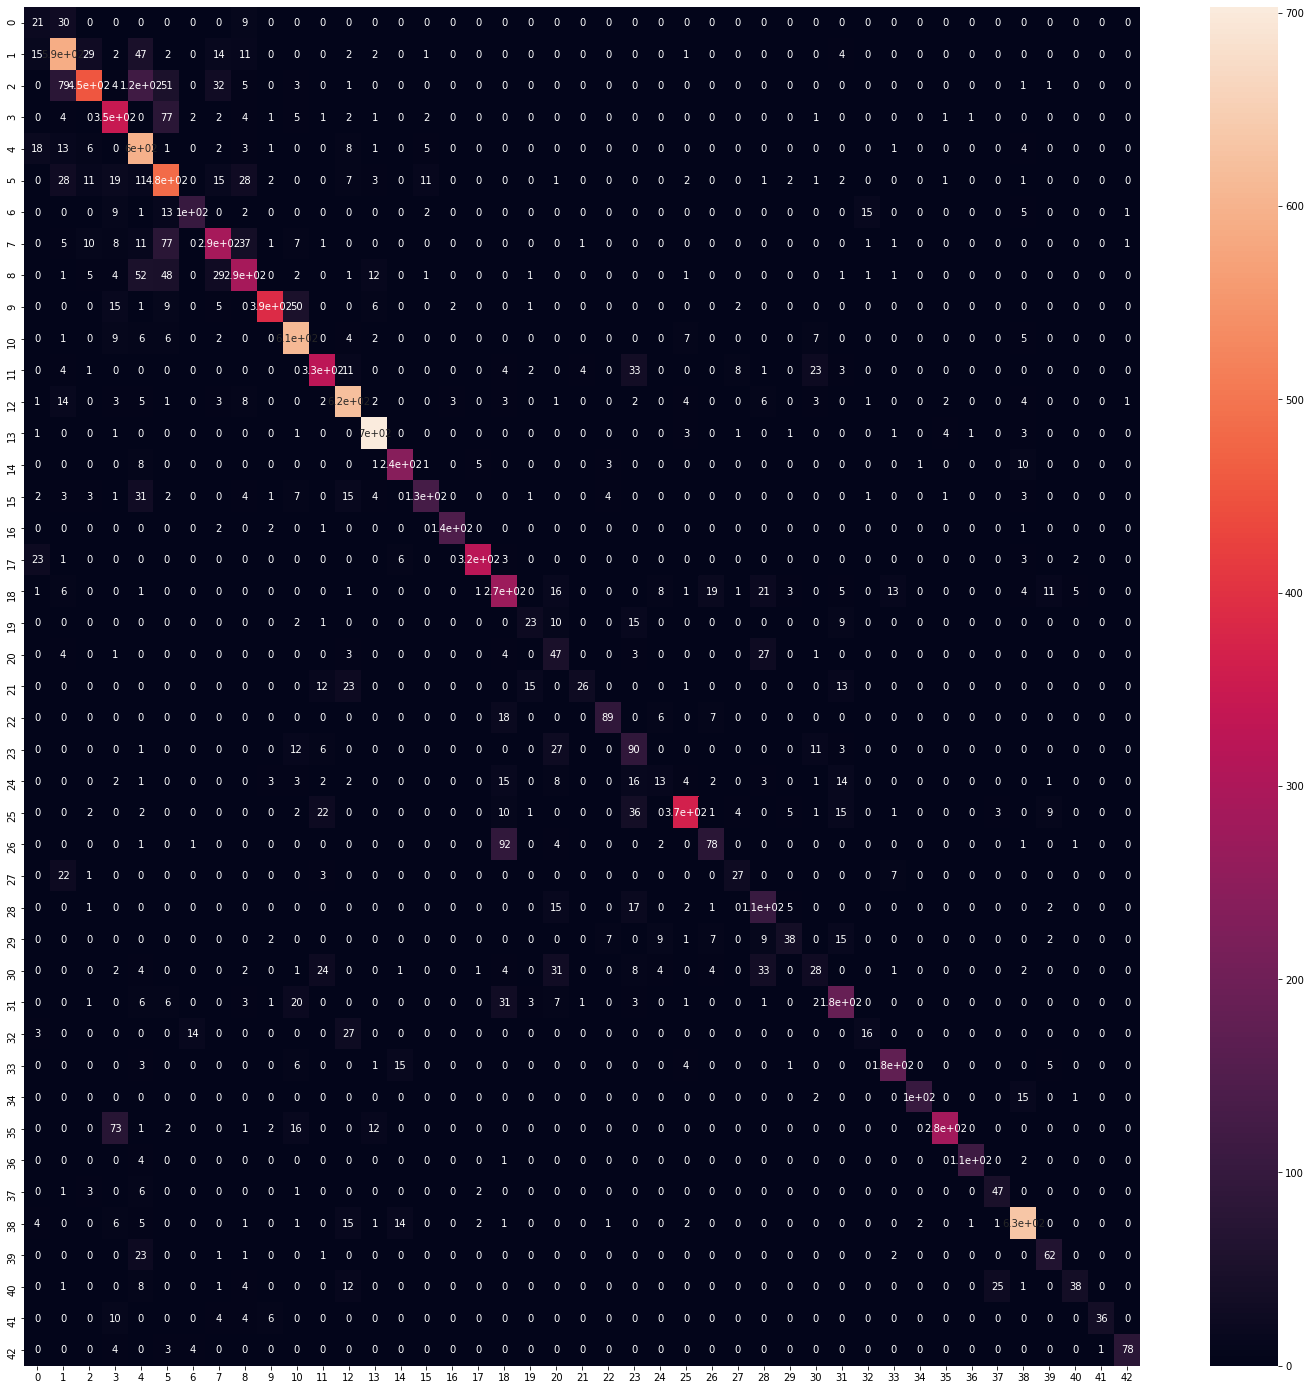

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))#so that we can make the visualization better
sns.heatmap(cm,annot=True)

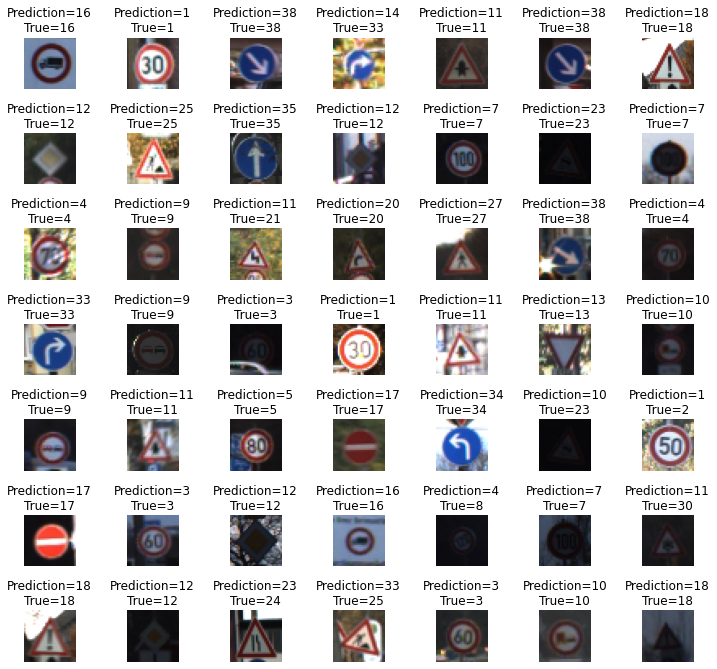

In [57]:
#plotting the actual images with the true labels and the predicted ones
L=7
W=7 #we are creating a grid of 7*7 means overall 49 images
fih,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()#to flatten the images
for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction={}\nTrue={}'.format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1) 
